# 自适应中值滤波

In [1]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats
import scipy.ndimage.filters as nd_filters
import time

In [2]:
gray = cv2.imread('../../datas/f4.jpg',0)
rgb = cv2.cvtColor(cv2.imread('../../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
rows,cols,ch = rgb.shape

In [3]:
def local_filter(x, order):
    x.sort()
    return x[order]

In [4]:
def ordfilt2(A, order, mask_size):
    return nd_filters.generic_filter(A, lambda x, 
                                     ord=order: local_filter(x, ord), 
                                     size=(mask_size, mask_size))

In [5]:
dst = ordfilt2(gray,4,3)

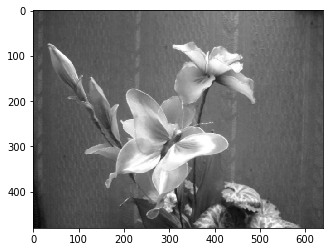

In [6]:
plt.imshow(dst,'gray')

In [7]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [8]:
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255
src_noise_gray[src_noise_gray < 0] = 0
src_noise_gray[src_noise_gray > 255] = 255
src_noise_gray = src_noise_gray.astype(np.uint8)

In [9]:
def adaptive_median_filter(img, s=3, s_max=7):

    x, y = img.shape
    # Initialize result image
    result = np.zeros_like(img)

    # Traverse through image
    for i in range(0, x):
        for j in range(0, y):
            # Set current filter size to starting filter size
            s_cur = s
            # While current filter size is smaller or equal to maximum filter size
            while s_cur <= s_max:
                # Create new filter list
                filtr = []

                filter_edge = s_cur//2

                # Traverse through filter
                for u in range(s_cur):
                    for v in range(s_cur):
                        # Get current position
                        cur_x = (i + u - filter_edge)
                        cur_y = (j + v - filter_edge)

                        # Stay inside image boundaries
                        if((cur_x >= 0) and (cur_y >= 0) and (cur_x < x) and (cur_y < y)):
                             # Append value to filter list
                            filtr.append(img[cur_x, cur_y])

                            # Get value in center of filter region
                            if cur_x == i and cur_y == j:
                                z_xy = filtr[-1]

                # Convert filter list to numpy array
                filtr = np.asarray(filtr)
                # Get minimum value in filter region
                z_min = np.amin(filtr)
                # Get maximum value in filter region
                z_max = np.amax(filtr)
                # Get median value in filter region
                z_med = np.median(filtr)

                # If z_med is not an impulse: check next case. else: increase window size
                if z_min < z_med < z_max:
                    # If z_xy is not an impulse: output z_xy. else: output z_med
                    if z_min < z_xy < z_max:
                        result[i, j] = z_xy
                    else:
                        result[i, j] = z_med
                    # Break to exit while loop
                    break
                else:
                    s_cur += 2

            else:
                result[i, j] = z_med # Output median value if maximum window size has been surpassed

    return result

In [10]:
dst = adaptive_median_filter(src_noise_gray)

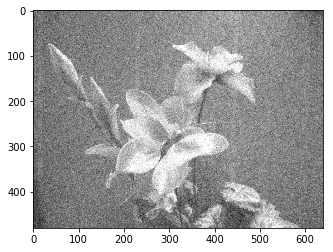

In [11]:
plt.imshow(dst,'gray')

In [12]:
dst = cv2.medianBlur(src_noise_gray,3)

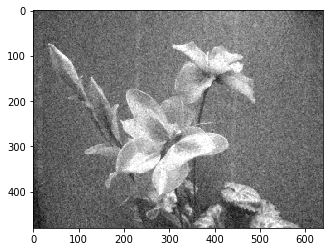

In [13]:
plt.imshow(dst,'gray')

In [14]:
dst = ordfilt2(src_noise_gray,4,3)

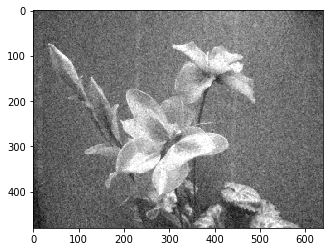

In [15]:
plt.imshow(dst,'gray')